In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn
import librosa.display
import IPython.display as ipd
import seaborn as sns

In [3]:
import os
general_path="/home/divum/STUDY/Projects/AUDIO CLASSIFICATION/Data"

In [4]:
print(list(os.listdir(f'{general_path}/genres_original/')))

['country', 'rock', 'reggae', 'classical', 'blues', 'jazz', 'pop', 'hiphop', 'metal', 'disco']


In [5]:
#importing 1 file
y,sr=librosa.load(f'{general_path}/genres_original/reggae/reggae.00036.wav')

In [6]:
print("y",y)
print()
print("Y shape",y.shape)
print()
print("Samole rate (khz)",sr)

y [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388]

Y shape (661794,)

Samole rate (khz) 22050


In [7]:
#Trim leading and trailing silence from an audio
audio_file,_=librosa.effects.trim(y)


print("Audio File",audio_file)
print()
print("Audio shape",audio_file.shape)

Audio File [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388]

Audio shape (661794,)


# 2D Representation of sound waves

Text(0.5, 1.0, 'Sound Waves in Reggae 36 ')

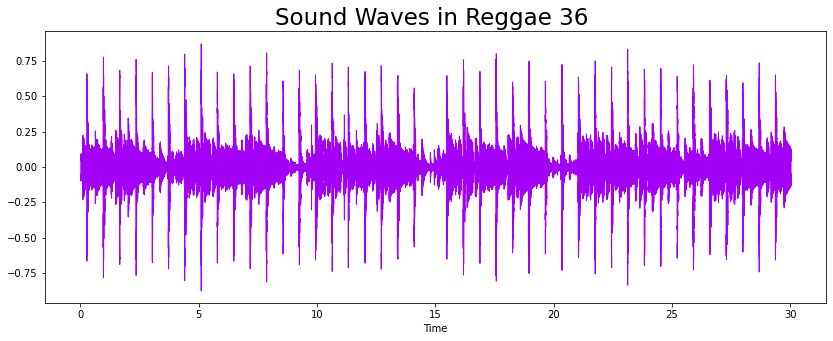

In [8]:
plt.figure(figsize=(14,5))
librosa.display.waveshow(y=audio_file,sr=sr,color="#A300f8")
plt.title("Sound Waves in Reggae 36 ",fontsize=23)

# EDA

In [9]:
data=pd.read_csv("features_30_sec.csv")

In [10]:
data.head()
data.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [11]:
data=data.drop(['harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',"length"],axis=1)

## Box plot for genres classification

In [12]:
# x=data[["label","tempo"]]
# f,ax=plt.subplots(figsize=(16,9))
# sns.boxplot(x="label",y="tempo",data=x,palette="husl")
# plt.title("BPM Boxplot of Genres",fontsize=23)
# plt.xticks(fontsize = 14)
# plt.yticks(fontsize = 10);
# plt.xlabel("Genre", fontsize = 15)
# plt.ylabel("BPM", fontsize = 15)
# plt.savefig("BPM Boxplot.jpg")

In [13]:
# Normalization
# PCA
# The Scatter Plot

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [15]:
data["label"]=data["label"].replace("blues",0)
data["label"]=data["label"].replace("classical",1)
data["label"]=data["label"].replace("country",2)
data["label"]=data["label"].replace("disco",3)
data["label"]=data["label"].replace("hiphop",4)
data["label"]=data["label"].replace("jazz",5)
data["label"]=data["label"].replace("metal",6)
data["label"]=data["label"].replace("pop",7)
data["label"]=data["label"].replace("reggae",8)
data["label"]=data["label"].replace("rock",9)

In [16]:
data=data.iloc[0:,1:]
y=data["label"]
x=data.loc[:,data.columns!="label"]

In [17]:
y.shape

(1000,)

In [18]:
x.shape

(1000, 52)

In [19]:
data.shape

(1000, 53)

In [20]:
#Normalize

In [21]:
cols=x.columns

In [22]:
m_m_s=MinMaxScaler()
scaled_x=m_m_s.fit_transform(x)
X=pd.DataFrame(scaled_x,columns=cols)

In [23]:
x

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,...,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035
1,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,...,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282
2,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,...,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025
3,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,...,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339
4,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,...,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,4253.557033,1.222421e+06,...,1.789867,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665
996,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,4149.338328,1.046621e+06,...,3.739020,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624
997,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,4031.405321,8.042154e+05,...,1.838090,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515
998,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,3015.631004,1.332712e+06,...,-2.812176,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088


In [24]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    9
996    9
997    9
998    9
999    9
Name: label, Length: 1000, dtype: int64

In [25]:
#PCA 2 Components

In [26]:
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(X)

In [27]:
principalDf=pd.DataFrame(data=principalComponents,columns=["principl1","principle2"])

In [28]:
principalDf

,principl1,principle2
0,-0.376327,-0.170165
1,0.083404,-0.253260
2,-0.447758,-0.315177
3,0.062243,-0.453889
4,-0.086710,-0.519379
...,...,...
995,-0.739337,-0.117372
996,-0.793668,-0.114073
997,-0.829776,-0.095847
998,-0.185052,-0.387805


In [29]:
# concatenate with target label

In [30]:
finalDf=pd.concat([principalDf,y],axis=1)

In [31]:
finalDf


,principl1,principle2,label
0,-0.376327,-0.170165,0
1,0.083404,-0.253260,0
2,-0.447758,-0.315177,0
3,0.062243,-0.453889,0
4,-0.086710,-0.519379,0
...,...,...,...
995,-0.739337,-0.117372,9
996,-0.793668,-0.114073,9
997,-0.829776,-0.095847,9
998,-0.185052,-0.387805,9


In [32]:
# finalDf["label"]=finalDf["label"].replace("blues",1)
# finalDf["label"]=finalDf["label"].replace("classical",2)
# finalDf["label"]=finalDf["label"].replace("country",3)
# finalDf["label"]=finalDf["label"].replace("disco",4)
# finalDf["label"]=finalDf["label"].replace("hiphop",5)
# finalDf["label"]=finalDf["label"].replace("jazz",6)
# finalDf["label"]=finalDf["label"].replace("metal",7)
# finalDf["label"]=finalDf["label"].replace("pop",8)
# finalDf["label"]=finalDf["label"].replace("reggae",9)
# finalDf["label"]=finalDf["label"].replace("rock",10)

In [33]:
pca.explained_variance_ratio_

array([0.2608561 , 0.22370026])

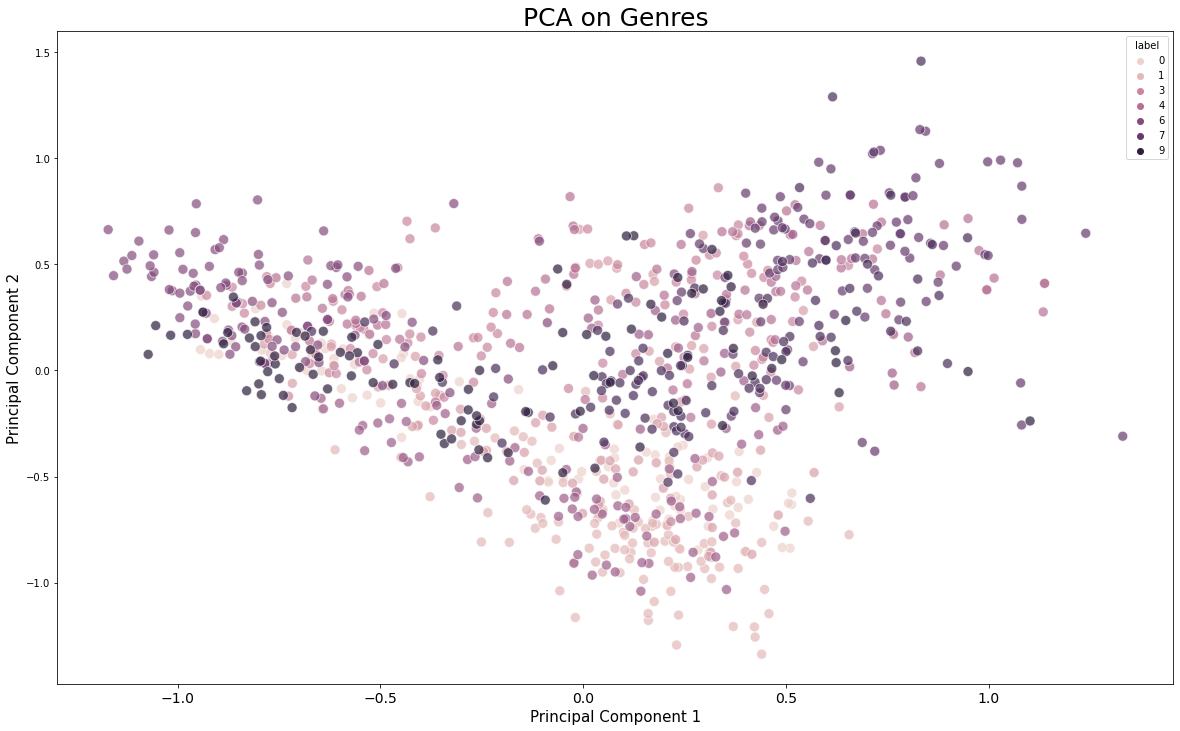

In [34]:
plt.figure(figsize=(20,12))
sns.scatterplot(x="principl1",y="principle2",data=finalDf,hue="label",alpha=0.7,s=100)
plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

# ML CLassification

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=23)

In [68]:
x_train.shape

(900, 52)

In [69]:
y_train.shape

(900,)

In [70]:
x_test.shape

(100, 52)

In [71]:
y_test.shape

(100,)

# Creating a Predefined function to assess the accuracy of a model

In [72]:
def model_assess(model,title="Default"):
    model.fit(x_train,y_train)
    preds=model.predict(x_test)
    print("Accuracy ",title," :",round(accuracy_score(y_test,preds),5))

In [73]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")

Accuracy  Naive Bayes  : 0.44
Accuracy  Stochastic Gradient Descent  : 0.25
Accuracy  KNN  : 0.34
Accuracy  Decission trees  : 0.44
Accuracy  Random Forest  : 0.69
Accuracy  Support Vector Machine  : 0.31
Accuracy  Logistic Regression  : 0.21
Accuracy  Neural Nets  : 0.09
Accuracy  Cross Gradient Booster  : 0.61
Accuracy  Cross Gradient Booster (Random Forest)  : 0.55


# Final Model

In [43]:
xgb=XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [44]:
preds = xgb.predict(x_test)

print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

Accuracy : 0.8 



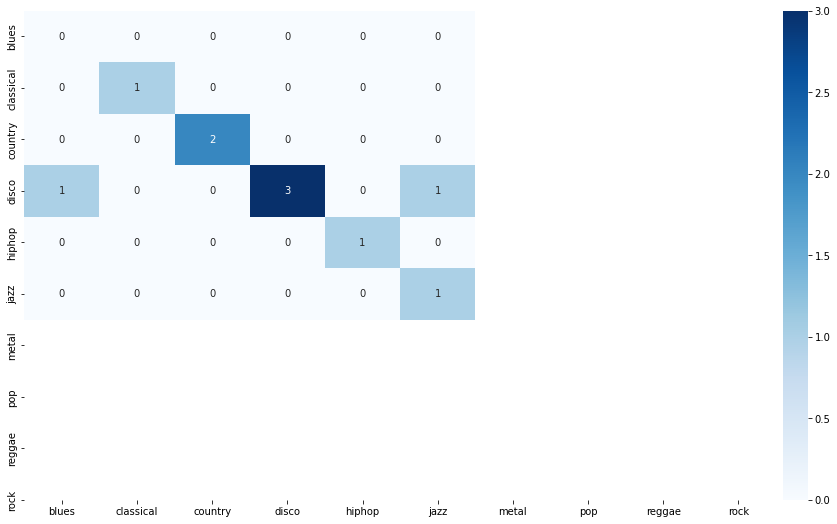

In [45]:
confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.savefig("conf matrix")

In [46]:
len(x.columns)

52

In [47]:
x.columns

Index(['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var'],
      dtype='object')

In [48]:
import librosa
import numpy as np

def extract_features(file_path):
    # Load audio file
    y, sr = librosa.load(file_path, duration=30)
    
    # Extract features
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    
    # Compute mean and variance of each feature
    features = [np.mean(chroma_stft), 
                np.var(chroma_stft),
                np.mean(rms), 
                np.var(rms),
                np.mean(spectral_centroid), 
                np.var(spectral_centroid),
                np.mean(spectral_bandwidth), 
                np.var(spectral_bandwidth),
                np.mean(rolloff), 
                np.var(rolloff),
                np.mean(zero_crossing_rate), 
                np.var(zero_crossing_rate)]
    
    for i in range(1,20):
        features.extend([np.mean(mfcc[i]), np.var(mfcc[i])])
    
    # Compute tempo
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    features.append(tempo)
    
    # Compute length of audio file
    length = librosa.get_duration(y=y, sr=sr)
    features.append(length)
    
    return features


In [49]:
l=extract_features("/home/divum/STUDY/Projects/AUDIO CLASSIFICATION/Data/genres_original/blues/blues.00009.wav")

In [50]:
l

[0.27401423,
 0.092326544,
 0.08132098,
 0.004347414,
 1817.5295466580835,
 298256.5306513026,
 1973.6903092643122,
 114209.09379289631,
 3944.584480970637,
 1367139.0996854836,
 0.0792153184258901,
 0.001376557806953003,
 115.15454,
 798.75323,
 -11.720503,
 668.95465,
 39.032555,
 350.82483,
 -20.357819,
 532.3013,
 13.089926,
 278.38568,
 -9.180816,
 126.545364,
 9.023639,
 67.952324,
 -14.101023,
 110.166046,
 4.283337,
 92.49027,
 -6.044196,
 84.86531,
 3.786368,
 104.494316,
 0.22368747,
 76.40331,
 -5.114481,
 85.41577,
 -0.41453698,
 104.041725,
 -1.1848985,
 59.331203,
 -1.9183391,
 58.489876,
 -2.2957962,
 83.17791,
 2.89123,
 77.03899,
 -4.234533,
 91.51975,
 80.74951171875,
 30.0]

In [51]:
x_test.values[0]

array([0.15511029, 0.6732613 , 0.11442703, 0.00965238, 0.2025154 ,
       0.02665858, 0.31280937, 0.07996211, 0.24769105, 0.07387169,
       0.13344879, 0.01202421, 0.479402  , 0.04653329, 0.67080552,
       0.09279067, 0.51278423, 0.11487283, 0.60339054, 0.11188281,
       0.53853459, 0.03753284, 0.6981204 , 0.05936183, 0.45291162,
       0.01051349, 0.4883037 , 0.05382813, 0.44436515, 0.04922256,
       0.5952564 , 0.05756308, 0.49589329, 0.05640298, 0.75625065,
       0.22805113, 0.64915858, 0.13792302, 0.47036101, 0.12757347,
       0.49609762, 0.17540974, 0.65109541, 0.20422415, 0.5445001 ,
       0.1157948 , 0.4468367 , 0.21247004, 0.53886826, 0.19850653,
       0.69263532, 0.25923821])

In [52]:
model = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)


In [53]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=0)

In [54]:
pre=model.predict(x_test)

In [55]:
y_test.values

array([5, 8, 2, 5, 9, 5, 5, 1, 5, 2])

In [56]:
pre

array([5, 8, 2, 5, 9, 9, 0, 1, 5, 2])

In [57]:
accuracy_score(pre,y_test)

0.8

In [58]:
sample=m_m_s.fit_transform([l])

In [59]:
sample

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [60]:
model.predict(sample)

array([1])